  # **GROUP 10 - HUMAN RESOURCE DATASET**

# Introduction
In this notebook you will implement the classification algorithm: Logistic Regression:
* Dataset description:...................................................................

### Below is a list of sections.
* 1. Data Pre-Processing
* 2. Building the model
* 3. Make prediction


Now, let us begin!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/maymo/Downloads/HR-Employee-Attrition (1).csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1. Data Pre-Processing
* We will check the data types for data cleaning purposes.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* In this dataset we will choose the variable "Attrition" as the target variable with the purpose of predicting the number of employees who have left.
* We will deal with binary problems


- First, we need to encode Attrition to binary

In [18]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

- Next, we will separate X (feature) and y (target variable)

In [22]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

- Drop irrelevant or constant columns

In [ ]:
irrelevant_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=irrelevant_columns)

- After separating X and y, we can identify the numberic feature and the categorical feature

In [32]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

- Next, we need to standardize the data and One-hot encoding for the categorical variable

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [49]:
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

* Let us visualize the pairlot

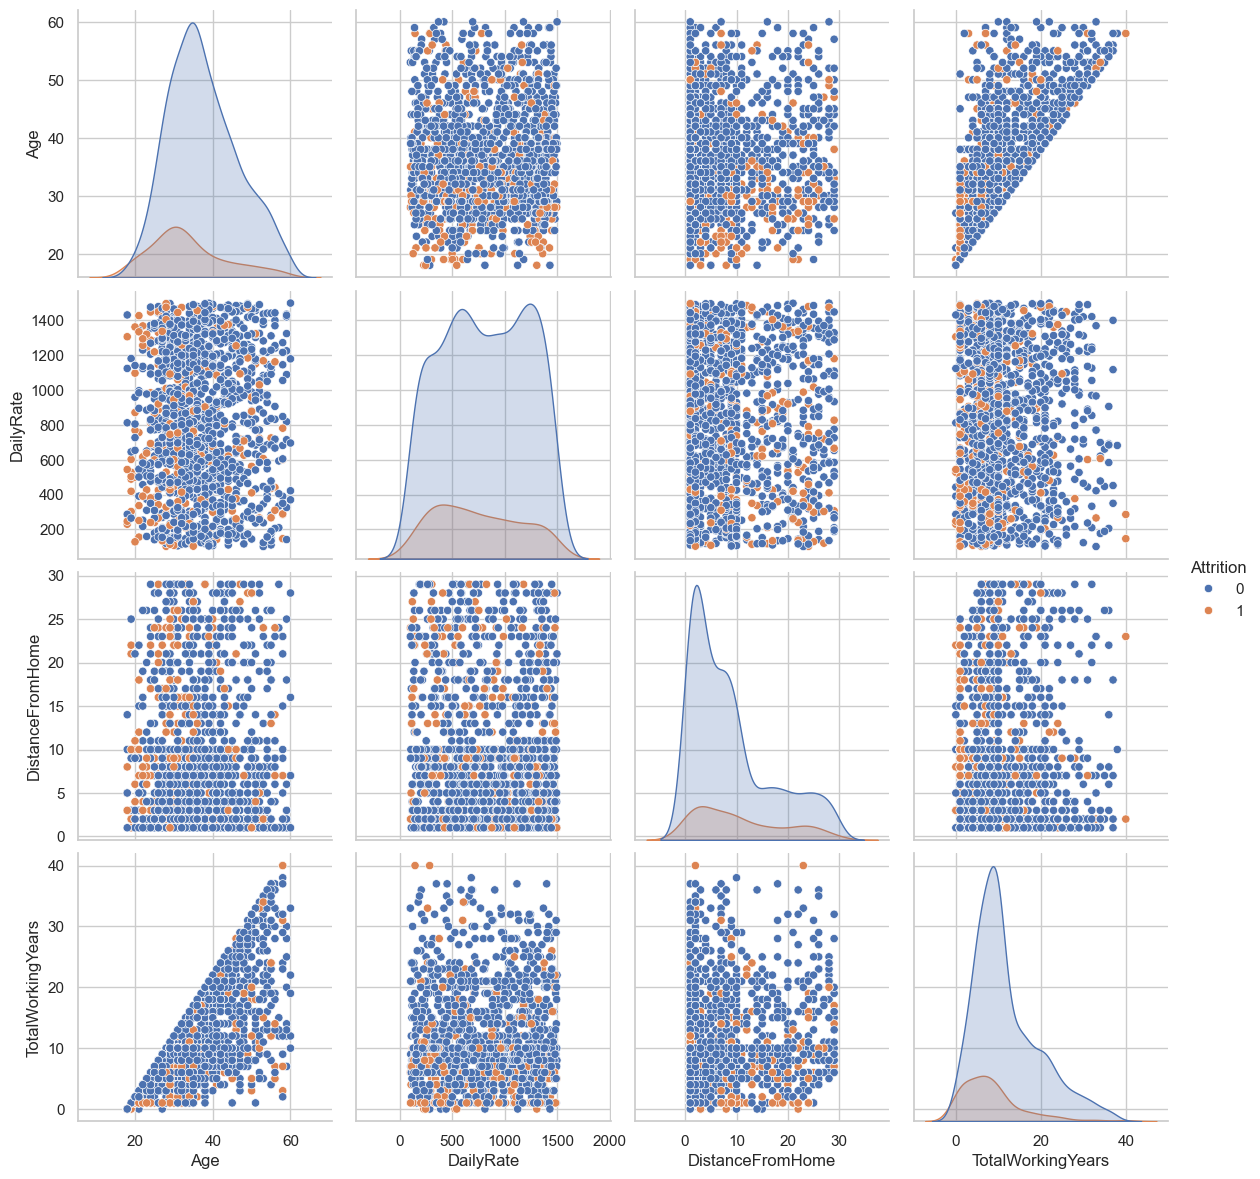

In [141]:
df_plot = df[['Age', 'DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'Attrition']]
sns.pairplot(df_plot, hue='Attrition', height=3)
plt.show()

## 2. Building the model
* After preprocessing the data, we will proceed to build the model.

- Proceed to check the classes in the target variable

In [59]:
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

Attrition
0    1233
1     237
Name: count, dtype: int64


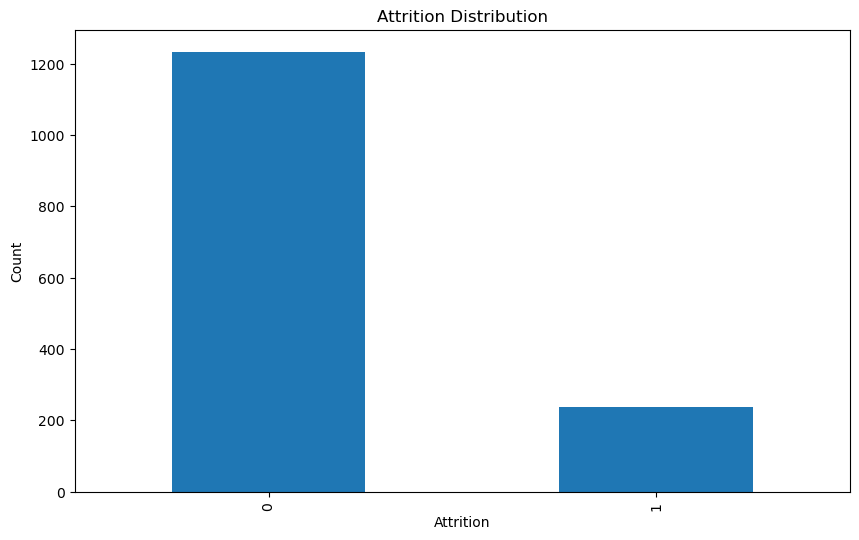

In [114]:
plt.figure(figsize=(10, 6))
df['Attrition'].value_counts()
df['Attrition'].value_counts().plot(kind='bar', title='Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

- we can see that there is an imbalance between the classes, so we need to use an optimal method to balance the data,
- In this notebook, we will use "stratify=y" and "class_weight='balanced'"




###  This chart visualizes the relationship between the target variable and the numeric variable

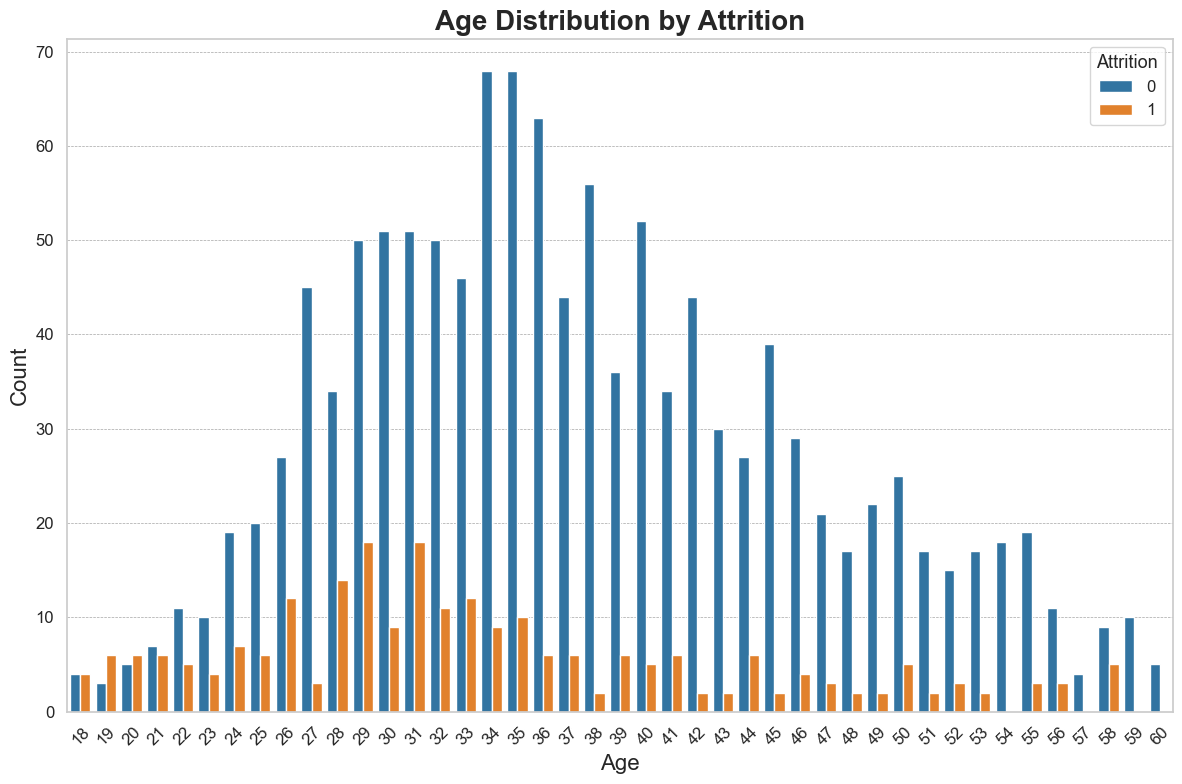

In [125]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='Age', hue='Attrition', palette={0: '#1f77b4', 1: '#ff7f0e'})
plt.title('Age Distribution by Attrition', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Attrition', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


## This chart visualizes the relationship between the target variable and the category variable

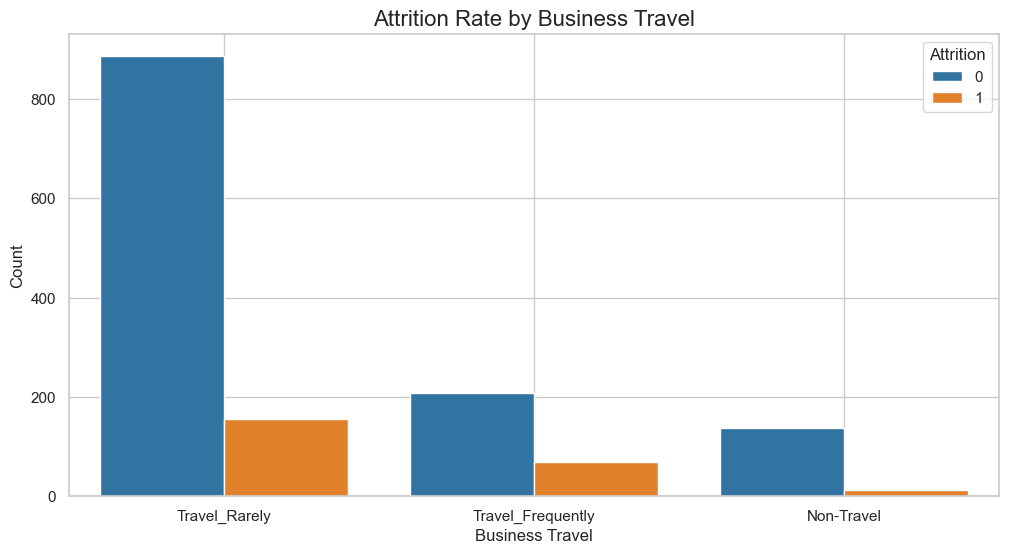

In [129]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette={0: '#1f77b4', 1: '#ff7f0e'})
plt.title('Attrition Rate by Business Travel', fontsize=16)
plt.xlabel('Business Travel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition')
plt.grid(True)
plt.show()


* Split the test sets to train and build a logistic regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y,)

logreg=LogisticRegression()
logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)

## 3. Make Prediction
* After building the model, we will proceed to make prediction.

In [76]:
y_pred = logreg.predict(X_test)
logreg.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [78]:
y_scores = logreg.predict_proba(X_test)
logreg.predict_proba(X_test)

array([[0.66857075, 0.33142925],
       [0.97704346, 0.02295654],
       [0.55294119, 0.44705881],
       [0.96365757, 0.03634243],
       [0.36854493, 0.63145507],
       [0.35799977, 0.64200023],
       [0.92173067, 0.07826933],
       [0.84797237, 0.15202763],
       [0.97689849, 0.02310151],
       [0.70931054, 0.29068946],
       [0.74343101, 0.25656899],
       [0.54008677, 0.45991323],
       [0.1737486 , 0.8262514 ],
       [0.44985603, 0.55014397],
       [0.35768589, 0.64231411],
       [0.33247369, 0.66752631],
       [0.84819011, 0.15180989],
       [0.96111378, 0.03888622],
       [0.43379468, 0.56620532],
       [0.90726515, 0.09273485],
       [0.2030354 , 0.7969646 ],
       [0.56645689, 0.43354311],
       [0.67081987, 0.32918013],
       [0.92792789, 0.07207211],
       [0.95799782, 0.04200218],
       [0.20946112, 0.79053888],
       [0.59841621, 0.40158379],
       [0.77070245, 0.22929755],
       [0.93731228, 0.06268772],
       [0.88318793, 0.11681207],
       [0.

- Next, we will evaluate accuracy, and  construct the confusion matrix as before.

In [83]:
from sklearn.metrics import confusion_matrix

acc=logreg.score(X_test,y_test)
print("The accuracy is",acc*100,"%.")

cm= confusion_matrix(y_test, y_pred)
print("The confustion matrix is... \n",cm)

The accuracy is 75.17006802721087 %.
The confustion matrix is... 
 [[190  57]
 [ 16  31]]


- The model's accuracy is 75.17%. This means the model correctly predicted 75.17% of the samples in the test set.
- About confusion matrix:

190 is the number of correctly predicted class 0 samples (True Negatives)
 
31 is the number of correctly predicted class 1 samples (True Positive* 

57 is the number of class 0 samples that are wrongly predicted to be class 1 (False Posite ).

16 is the number of class 1 samples that are wrongly predicted to be class 0 (False Negaves).

In [149]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.35      0.66      0.46        47

    accuracy                           0.75       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.75      0.78       294



The value of AUC is 0.7986906710310966


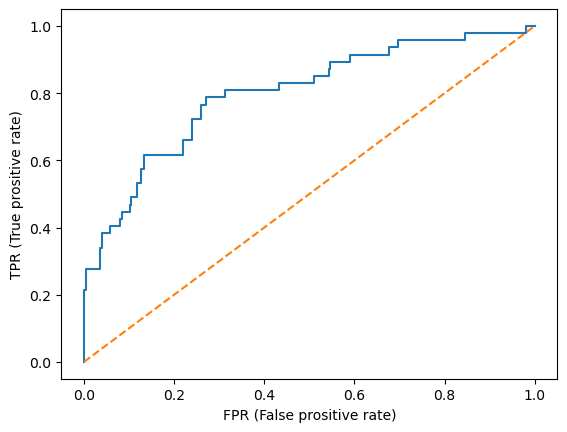

In [94]:
from sklearn.metrics import roc_curve, auc

y_scores = logreg.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

print("The value of AUC is",roc_auc)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.ylabel('TPR (True prositive rate)')
plt.xlabel('FPR (False prositive rate)')
plt.show()

## Congratulations

You have finished this notebook.